In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<b>Load data</b>

In [30]:
daily = pd.read_csv('../data/daily_data.csv', skiprows=2)

In [31]:
daily.isna().sum()

time                             0
temperature_2m_mean (°C)         1
relative_humidity_2m_mean (%)    1
temperature_2m_min (°C)          0
temperature_2m_max (°C)          0
dtype: int64

In [32]:
daily = daily.dropna()

In [33]:
daily

,time,temperature_2m_mean (°C),relative_humidity_2m_mean (%),temperature_2m_min (°C),temperature_2m_max (°C)
0,2015-01-01,16.1,66.0,9.7,22.8
1,2015-01-02,15.8,66.0,10.7,21.4
2,2015-01-03,16.0,78.0,11.2,19.9
3,2015-01-04,18.7,84.0,16.4,22.3
4,2015-01-05,20.8,84.0,17.8,25.1
...,...,...,...,...,...
3771,2025-04-29,25.9,88.0,23.1,29.4
3772,2025-04-30,26.5,87.0,24.1,30.3
3773,2025-05-01,25.4,85.0,23.6,28.1
3774,2025-05-02,26.9,80.0,22.7,31.4


In [47]:
hourly = pd.read_csv('../data/hourly_data.csv', skiprows=2)

In [48]:
hourly.isna().sum()

time                         0
temperature_2m (°C)         16
relative_humidity_2m (%)    16
dtype: int64

In [49]:
hourly = hourly.dropna()

In [50]:
hourly

,time,temperature_2m (°C),relative_humidity_2m (%)
0,2020-01-01T00:00,19.5,93.0
1,2020-01-01T01:00,19.3,93.0
2,2020-01-01T02:00,19.2,94.0
3,2020-01-01T03:00,19.1,94.0
4,2020-01-01T04:00,18.9,94.0
...,...,...,...
46803,2025-05-04T03:00,25.7,94.0
46804,2025-05-04T04:00,25.6,94.0
46805,2025-05-04T05:00,25.6,95.0
46806,2025-05-04T06:00,25.6,95.0


# Data visualization

### Daily data

In [37]:
from predict_utils import *
data_daily = add_features(daily, is_daily=True)

e:\WorkSpace\GitHub\Weather_Prediction\src\predict_utils.py:164: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [40]:
data_daily.isna().sum()

time                                          0
temperature_2m_mean (°C)                      0
relative_humidity_2m_mean (%)                 0
temperature_2m_min (°C)                       0
temperature_2m_max (°C)                       0
day_of_year                                   0
month                                         0
day_of_week                                   0
month_sin                                     0
month_cos                                     0
day_sin                                       0
day_cos                                       0
temp_range                                    0
temperature_2m_mean (°C)_rolling_mean         0
temperature_2m_mean (°C)_rolling_std          0
relative_humidity_2m_mean (%)_rolling_mean    0
relative_humidity_2m_mean (%)_rolling_std     0
temperature_2m_max (°C)_rolling_mean          0
temperature_2m_max (°C)_rolling_std           0
temperature_2m_min (°C)_rolling_mean          0
temperature_2m_min (°C)_rolling_std     

In [41]:
data_daily = data_daily.dropna()

In [43]:
data_daily['time'] = pd.to_datetime(data_daily['time'], format='%Y-%m-%d')
data_daily = data_daily.set_index('time')
data_daily = data_daily.sort_index(ascending=True)
data_daily


,temperature_2m_mean (°C),relative_humidity_2m_mean (%),temperature_2m_min (°C),temperature_2m_max (°C),day_of_year,month,day_of_week,month_sin,month_cos,day_sin,...,temperature_2m_min (°C)_rolling_std,temperature_2m_mean (°C)_lag_1,temperature_2m_mean (°C)_lag_7,relative_humidity_2m_mean (%)_lag_1,relative_humidity_2m_mean (%)_lag_7,temperature_2m_max (°C)_lag_1,temperature_2m_max (°C)_lag_7,temperature_2m_min (°C)_lag_1,temperature_2m_min (°C)_lag_7,temp_humidity_interaction
time,,,,,,,,,,,,,,,,,,,,,
2015-01-08,14.1,79.0,13.2,15.2,8,1,3,0.500000,0.866025,0.137279,...,2.867552,15.9,16.1,79.0,66.0,17.3,22.8,14.5,9.7,1113.9
2015-01-09,13.9,70.0,12.0,15.3,9,1,4,0.500000,0.866025,0.154309,...,2.615795,14.1,15.8,79.0,66.0,15.2,21.4,13.2,10.7,973.0
2015-01-10,11.9,88.0,11.4,12.3,10,1,5,0.500000,0.866025,0.171293,...,2.572844,13.9,16.0,70.0,78.0,15.3,19.9,12.0,11.2,1047.2
2015-01-11,12.5,90.0,11.7,13.5,11,1,6,0.500000,0.866025,0.188227,...,2.654197,11.9,18.7,88.0,84.0,12.3,22.3,11.4,16.4,1125.0
2015-01-12,14.5,75.0,11.6,19.3,12,1,0,0.500000,0.866025,0.205104,...,2.157159,12.5,20.8,90.0,84.0,13.5,25.1,11.7,17.8,1087.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-29,25.9,88.0,23.1,29.4,119,4,1,0.866025,-0.500000,0.888057,...,1.116542,25.4,30.1,89.0,75.0,28.5,36.6,23.2,25.5,2279.2
2025-04-30,26.5,87.0,24.1,30.3,120,4,2,0.866025,-0.500000,0.880012,...,0.904486,25.9,28.9,88.0,80.0,29.4,37.1,23.1,25.6,2305.5
2025-05-01,25.4,85.0,23.6,28.1,121,5,3,0.500000,-0.866025,0.871706,...,0.850210,26.5,28.3,87.0,82.0,30.3,33.4,24.1,24.6,2159.0


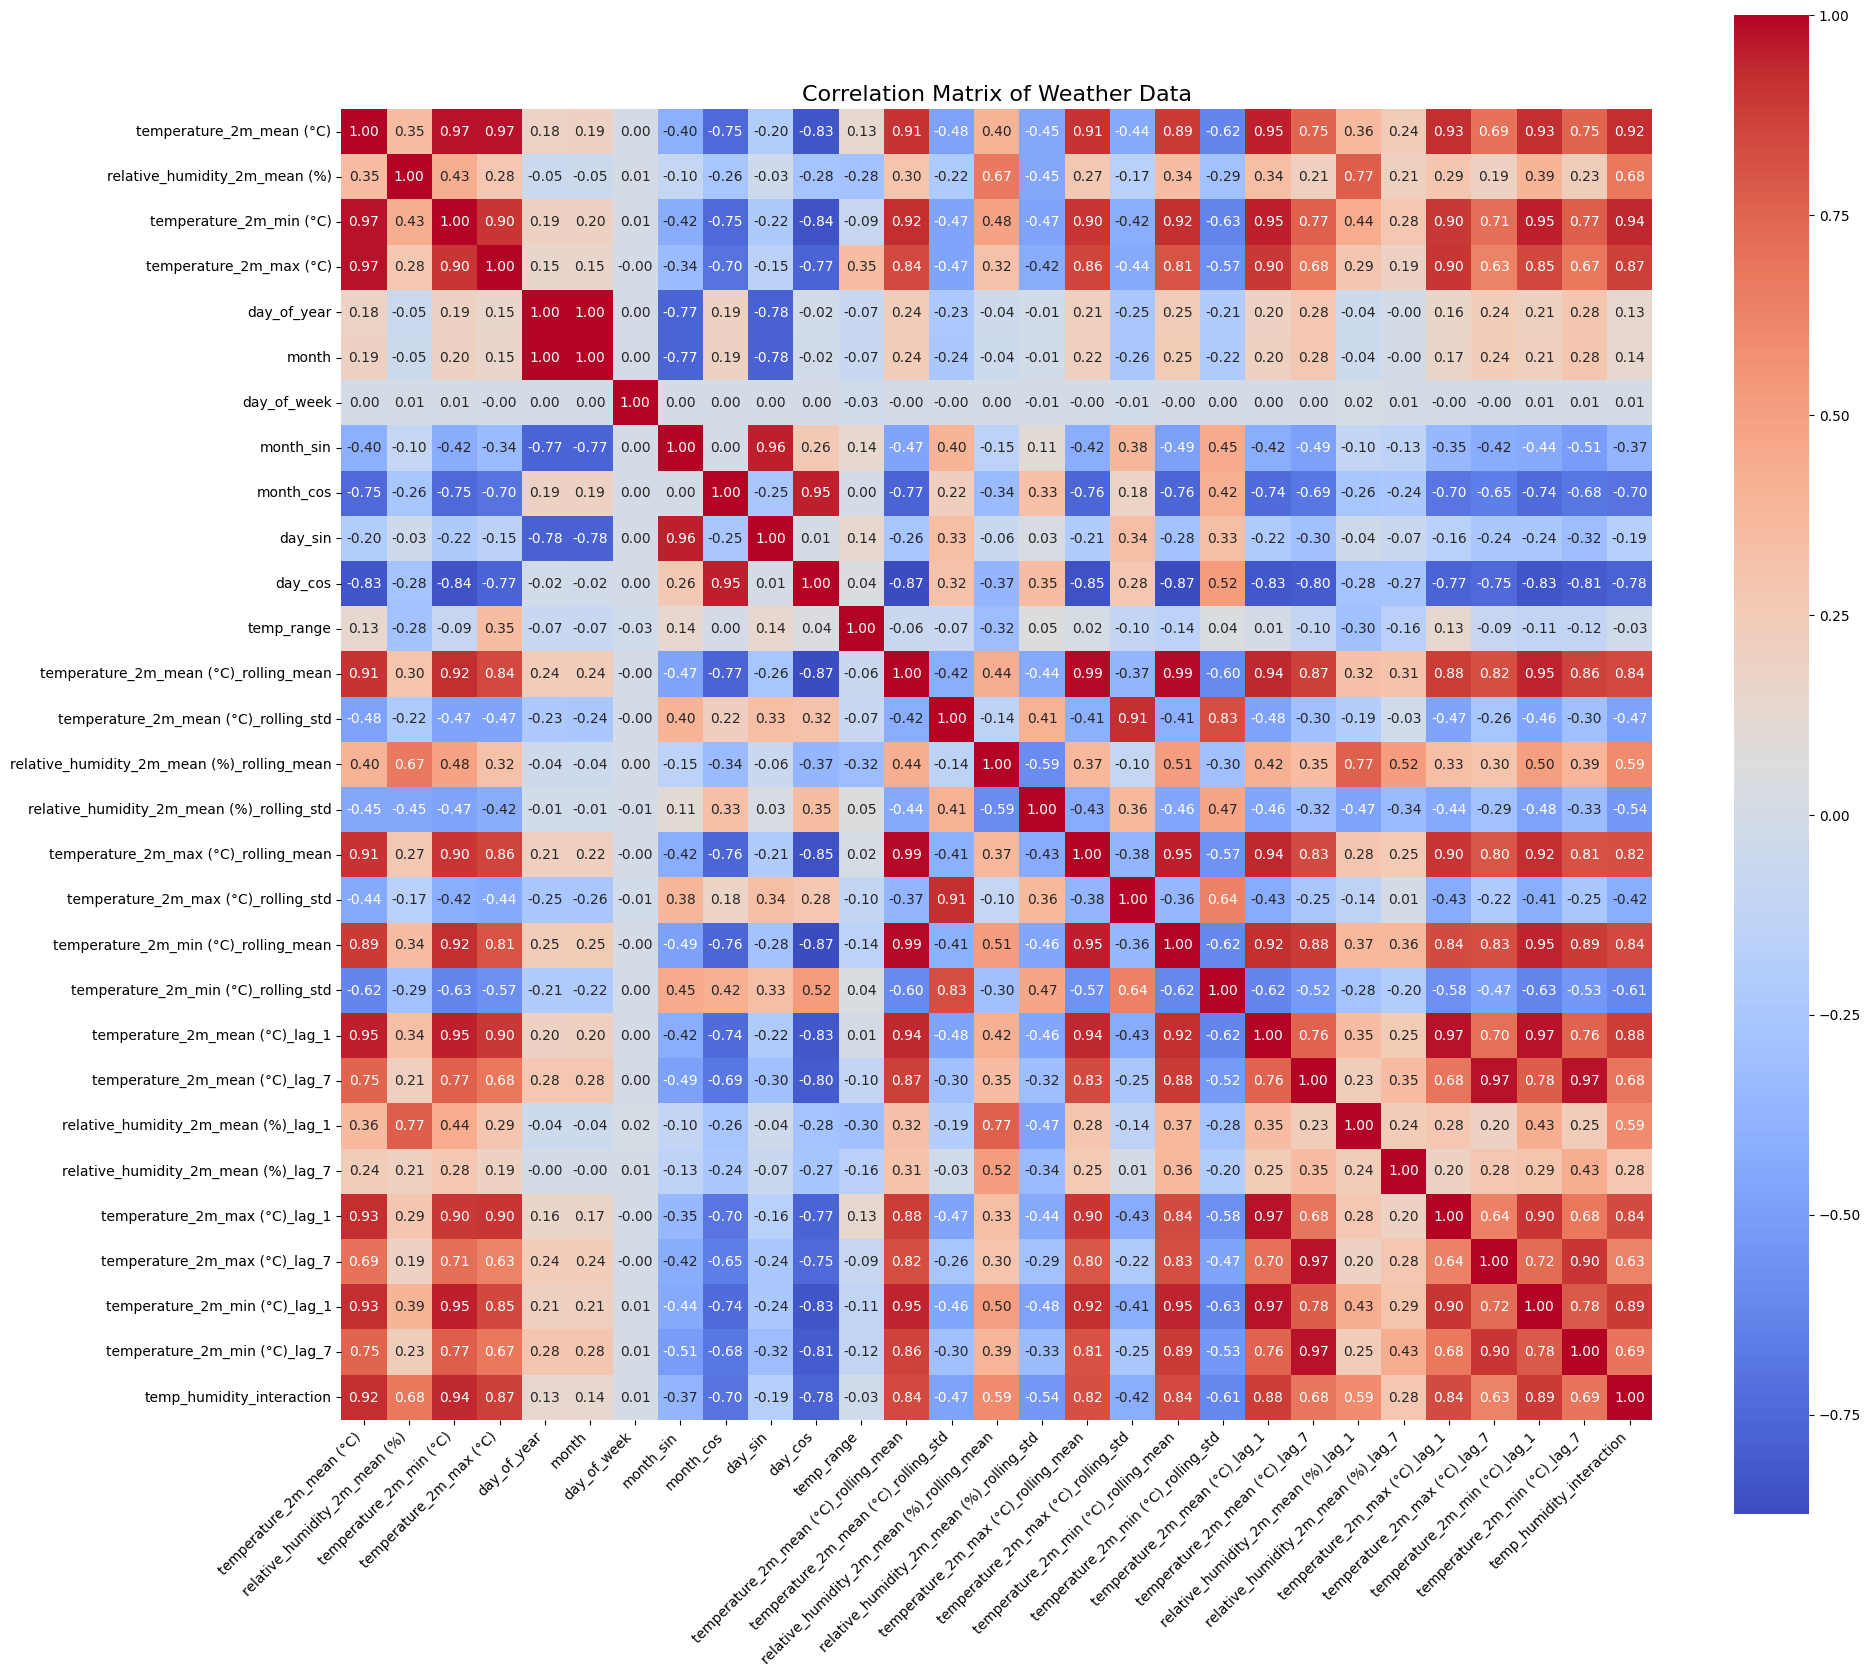

In [46]:
corr_matrix_daily = data_daily.corr(method='pearson')

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix_daily, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Weather Data', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Hourly data

In [51]:
data_hourly = add_features(hourly, is_daily=False)


e:\WorkSpace\GitHub\Weather_Prediction\src\predict_utils.py:164: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [52]:
data_hourly.isna().sum()

time                                      0
temperature_2m (°C)                       0
relative_humidity_2m (%)                  0
day_of_year                               0
month                                     0
day_of_week                               0
month_sin                                 0
month_cos                                 0
day_sin                                   0
day_cos                                   0
hour                                      0
hour_sin                                  0
hour_cos                                  0
temperature_2m (°C)_rolling_mean          0
temperature_2m (°C)_rolling_std           1
relative_humidity_2m (%)_rolling_mean     0
relative_humidity_2m (%)_rolling_std      1
temperature_2m (°C)_lag_1                 1
temperature_2m (°C)_lag_24               24
relative_humidity_2m (%)_lag_1            1
relative_humidity_2m (%)_lag_24          24
temp_humidity_interaction                 0
dtype: int64

In [53]:
data_hourly = data_hourly.dropna()

In [54]:
data_hourly['time'] = pd.to_datetime(data_hourly['time'], format='ISO8601')
data_hourly = data_hourly.set_index('time')
data_hourly = data_hourly.sort_index(ascending=True)
data_hourly

,temperature_2m (°C),relative_humidity_2m (%),day_of_year,month,day_of_week,month_sin,month_cos,day_sin,day_cos,hour,...,hour_cos,temperature_2m (°C)_rolling_mean,temperature_2m (°C)_rolling_std,relative_humidity_2m (%)_rolling_mean,relative_humidity_2m (%)_rolling_std,temperature_2m (°C)_lag_1,temperature_2m (°C)_lag_24,relative_humidity_2m (%)_lag_1,relative_humidity_2m (%)_lag_24,temp_humidity_interaction
time,,,,,,,,,,,,,,,,,,,,,
2020-01-02 00:00:00,18.5,94.0,2,1,3,0.5,0.866025,0.034422,0.999407,0,...,1.000000e+00,19.908333,1.361239,86.916667,9.324660,18.5,19.5,94.0,93.0,1739.0
2020-01-02 01:00:00,18.6,95.0,2,1,3,0.5,0.866025,0.034422,0.999407,1,...,9.659258e-01,19.879167,1.382178,87.000000,9.390097,18.5,19.3,94.0,93.0,1767.0
2020-01-02 02:00:00,18.9,95.0,2,1,3,0.5,0.866025,0.034422,0.999407,2,...,8.660254e-01,19.866667,1.389922,87.041667,9.424663,18.6,19.2,95.0,94.0,1795.5
2020-01-02 03:00:00,19.0,92.0,2,1,3,0.5,0.866025,0.034422,0.999407,3,...,7.071068e-01,19.862500,1.392468,86.958333,9.369141,18.9,19.1,95.0,94.0,1748.0
2020-01-02 04:00:00,19.0,93.0,2,1,3,0.5,0.866025,0.034422,0.999407,4,...,5.000000e-01,19.866667,1.389609,86.916667,9.338637,19.0,18.9,92.0,94.0,1767.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-04 03:00:00,25.7,94.0,124,5,6,0.5,-0.866025,0.845249,-0.534373,3,...,7.071068e-01,27.516667,2.169886,82.916667,9.690500,25.8,25.0,93.0,88.0,2415.8
2025-05-04 04:00:00,25.6,94.0,124,5,6,0.5,-0.866025,0.845249,-0.534373,4,...,5.000000e-01,27.545833,2.137650,83.125000,9.878886,25.7,24.9,94.0,89.0,2406.4
2025-05-04 05:00:00,25.6,95.0,124,5,6,0.5,-0.866025,0.845249,-0.534373,5,...,2.588190e-01,27.579167,2.098857,83.375000,10.107305,25.6,24.8,94.0,89.0,2432.0


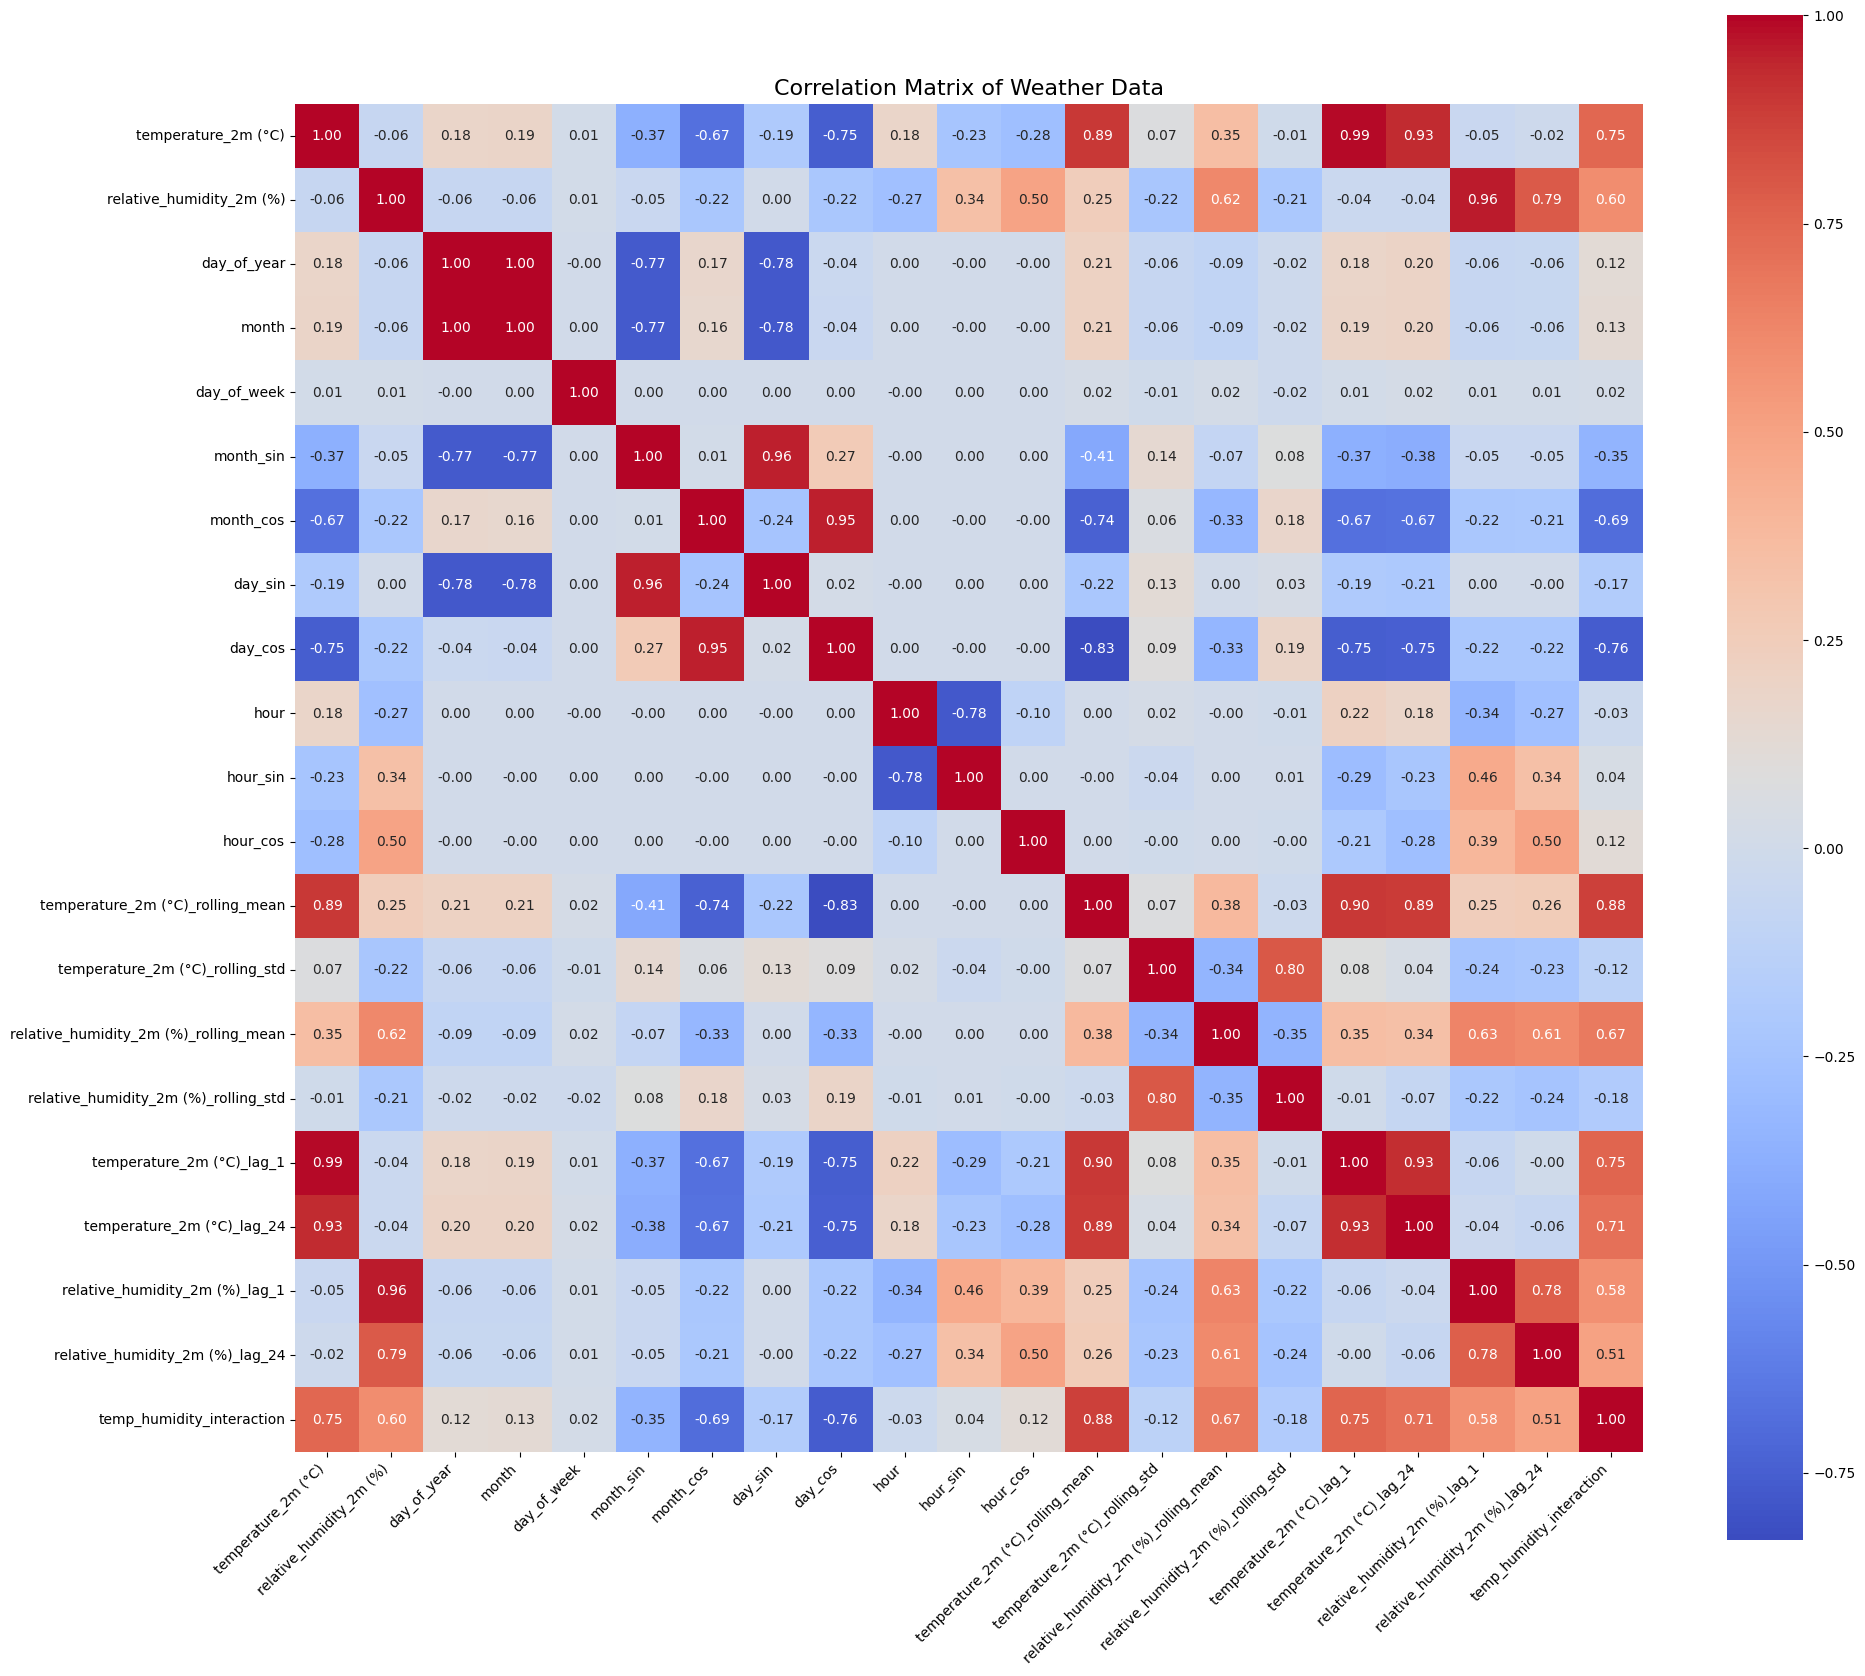

In [56]:
corr_matrix_hourly = data_hourly.corr(method='pearson')

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix_hourly, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Weather Data', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()